In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# for jupyter
%matplotlib inline 

dt = pd.read_csv('Dataset/heart.csv')
"""
font: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
Attribute Information
    Age: age of the patient [years]
    Sex: sex of the patient [M: Male, F: Female]
    ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
    RestingBP: resting blood pressure [mm Hg]
    Cholesterol: serum cholesterol [mm/dl] // algumas referêcias apontam mg/dl
    FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
    RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
    MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
    ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
    Oldpeak: oldpeak = ST [Numeric value measured in depression]
    ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
    HeartDisease: output class [1: heart disease, 0: Normal]
"""      
print(dt.shape)
print(dt.info())
dt.head(100)

(918, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,58,M,ASY,130,263,0,Normal,140,Y,2.0,Flat,1
96,43,M,ATA,142,207,0,Normal,138,N,0.0,Up,0
97,39,M,NAP,160,147,1,Normal,160,N,0.0,Up,0
98,56,M,ASY,120,85,0,Normal,140,N,0.0,Up,0


In [2]:
""" convert object datatype to decimal """
#Sex
dt["Sex"] = dt["Sex"].apply(lambda x: 1 if x == 'M' else 0)
#ChestPainTypes
ChestPainTypes = ["TA","ATA","NAP","ASY"]
dt["ChestPainType"] = dt["ChestPainType"].apply(lambda x: ChestPainTypes.index(x))

## trocando os valores iguais a zero pela média ##
# Cholesterol
dt["Cholesterol"] = dt["Cholesterol"].apply(lambda x: dt["Cholesterol"].mean() if x == 0 else x) 
# RestingBP - 
dt["RestingBP"] = dt["RestingBP"].apply(lambda x: dt["RestingBP"].mean() if x == 0 else x)


# RestingECG
dt["RestingECG"] = dt["RestingECG"].apply(lambda x:['Normal', 'ST', 'LVH'].index(x))

# ExerciseAngina
dt["ExerciseAngina"] = dt["ExerciseAngina"].apply(lambda x: 1 if x == 'Y' else 0)


# dt['ST_Slope'].unique() # array(['Up', 'Flat', 'Down'], dtype=object)
dt['ST_Slope'] =  dt['ST_Slope'].apply(lambda x: ['Up', 'Flat', 'Down'].index(x))


In [3]:
dt.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140.0,289.0,0,0,172,0,0.0,0,0
1,49,0,2,160.0,180.0,0,0,156,0,1.0,1,1
2,37,1,1,130.0,283.0,0,1,98,0,0.0,0,0
3,48,0,3,138.0,214.0,0,0,108,1,1.5,1,1
4,54,1,2,150.0,195.0,0,0,122,0,0.0,0,0
5,39,1,2,120.0,339.0,0,0,170,0,0.0,0,0
6,45,0,1,130.0,237.0,0,0,170,0,0.0,0,0
7,54,1,1,110.0,208.0,0,0,142,0,0.0,0,0
8,37,1,3,140.0,207.0,0,0,130,1,1.5,1,1
9,48,0,1,120.0,284.0,0,0,120,0,0.0,0,0


In [4]:
# dt[ dt['Cholesterol'] != 0] # filtrar valores
# dt['RestingECG'].unique() # juntar valores iguais
print(dt.info())
dt.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    float64
 4   Cholesterol     918 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 86.2 KB
None


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,2.251634,132.540737,236.047413,0.233115,0.603486,136.809368,0.404139,0.887364,0.638344,0.553377
std,9.432617,0.407701,0.931031,17.989932,56.240952,0.423046,0.805968,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,80.000000,85.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,2.000000,120.000000,198.799564,0.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,3.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,3.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


Hist: 


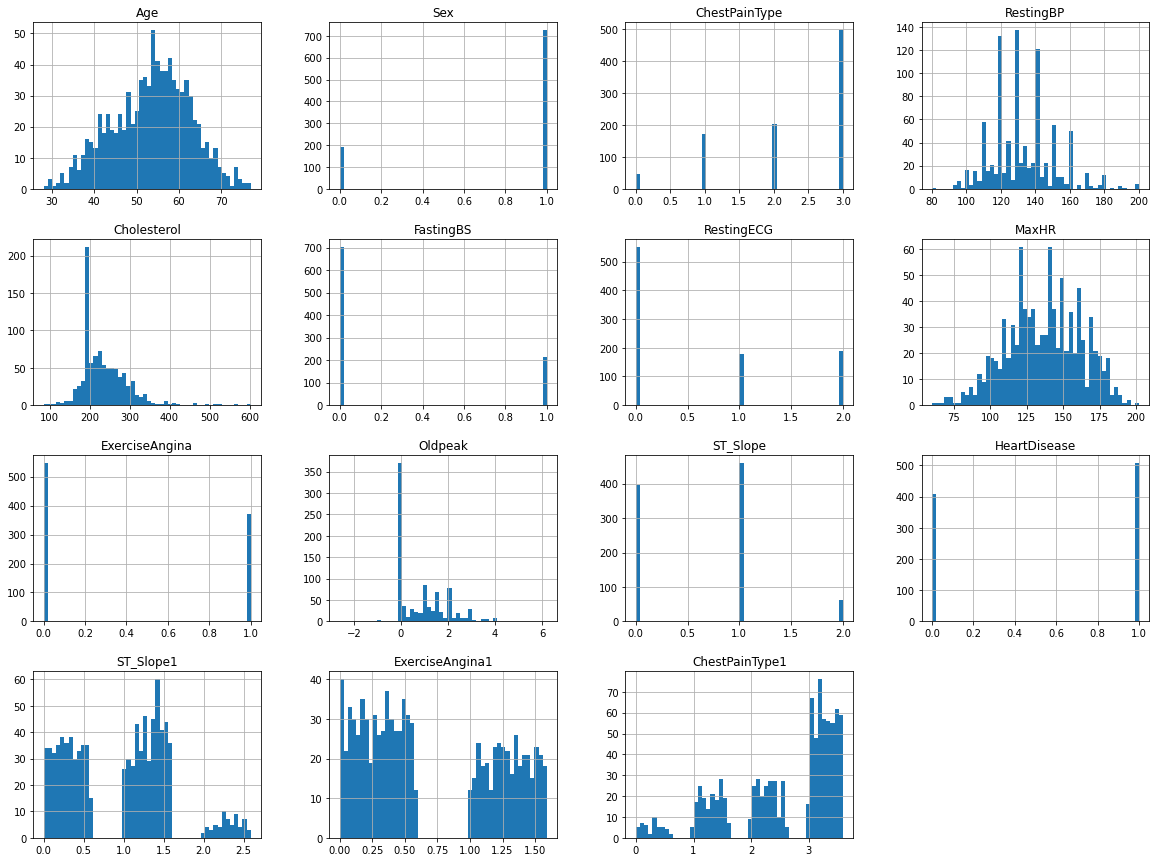

In [32]:
dt.hist(bins=50,figsize=(20,15))
print("Hist: ")

Matriz de cofusão: 


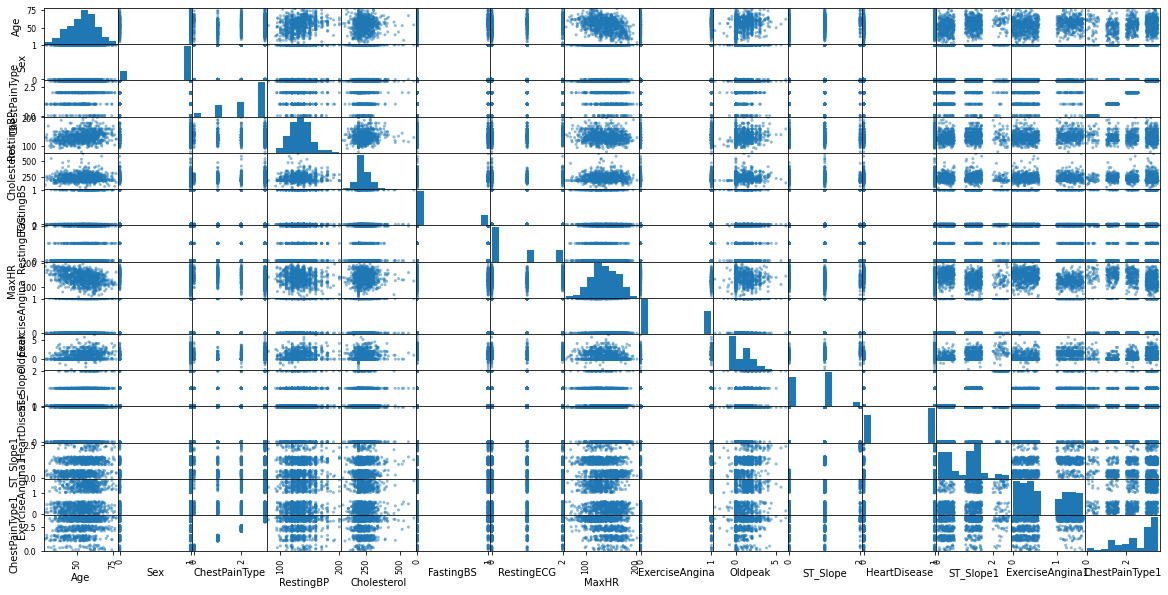

In [33]:
pd.plotting.scatter_matrix(dt, figsize=(20,10))
print('Matriz de cofusão: ')

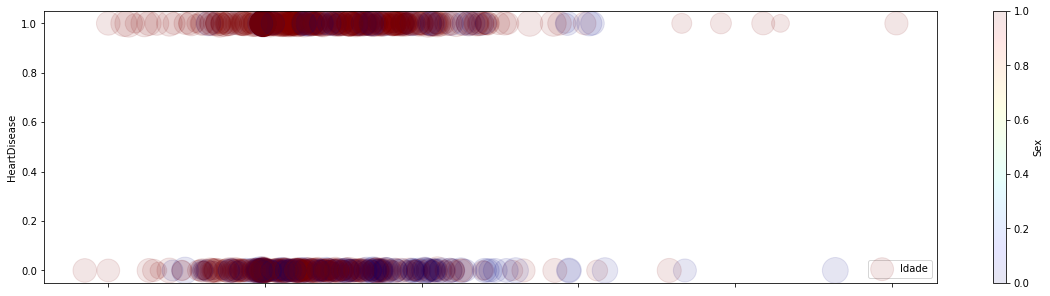

In [8]:
dt.plot(kind="scatter", y="HeartDisease", x="Cholesterol", alpha=0.1,s=dt["Age"]*10, label="Idade",c="Sex",cmap=plt.get_cmap("jet"), colorbar=True,figsize=(20,5))
plt.legend()

In [9]:
""" 
# A abordagem abaixo é tendenciosa - pq a correlação entre
# a Idade e doença cardiaca depende da relação do banco de dados usadas e 
# não necessariamente do que acontence na natureza

# dt['age per disease']
#dt['Age']
#dt['HeartDisease']
class Tage():
    def __init__(self, _age, doente):
        self.age = _age
        self.qtd = 0
        self.doencas = 0
        self.AdicionaPeople(doente)
        self.percent = 0
    def AdicionaPeople(self,doente):
        self.qtd+=1
        if (doente):
            self.doencas+=1
        self.percent = self.doencas/self.qtd
            
    def __str__(self):
        return 'Age:'+str(self.age)+"  "+str(self.doencas)+" de "+str(self.qtd)+" = "+str(self.percent)
   
    def __eq__(self,b):
        return self.age == b

    
# idade_28 = Tage(28)

#print(idade_28)
#t = dt.copy()
# t.groupby(['Age'])['Age'].agg('count')
pessoas = []
for i in dt.index:
    idade = dt['Age'][i]
    doente = dt['HeartDisease'][i]
    if idade in pessoas:        
        indice = pessoas.index(idade)
        pessoas[indice].AdicionaPeople(doente)

    else:
        pessoas.append(Tage(idade,doente))
    

idades = [ i.age for i in pessoas]
qtds = [i.qtd for i in pessoas]
percent = [i.percent for i in pessoas]

# print(qtds)
dataset = pd.DataFrame()
dataset['Age'] = idades
dataset['percent'] = percent

dataset.plot(kind = 'scatter', x='Age',y='percent')
"""

' \n# A abordagem abaixo é tendenciosa - pq a correlação entre\n# a Idade e doença cardiaca depende da relação do banco de dados usadas e \n# não do que acontence na natureza\n\n# dt[\'age per disease\']\n#dt[\'Age\']\n#dt[\'HeartDisease\']\nclass Tage():\n    def __init__(self, _age, doente):\n        self.age = _age\n        self.qtd = 0\n        self.doencas = 0\n        self.AdicionaPeople(doente)\n        self.percent = 0\n    def AdicionaPeople(self,doente):\n        self.qtd+=1\n        if (doente):\n            self.doencas+=1\n        self.percent = self.doencas/self.qtd\n            \n    def __str__(self):\n        return \'Age:\'+str(self.age)+"  "+str(self.doencas)+" de "+str(self.qtd)+" = "+str(self.percent)\n   \n    def __eq__(self,b):\n        return self.age == b\n\n    \n# idade_28 = Tage(28)\n\n#print(idade_28)\n#t = dt.copy()\n# t.groupby([\'Age\'])[\'Age\'].agg(\'count\')\npessoas = []\nfor i in dt.index:\n    idade = dt[\'Age\'][i]\n    doente = dt[\'HeartDisease

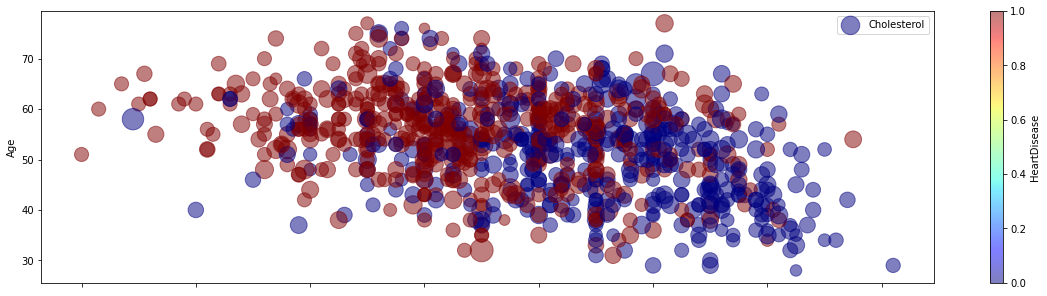

In [28]:
# como os dados são binários, é mais interessante tentar aplicar uma cor ao resultado
# o resultado abaixo ainda é influenciado pelo tamanho dos círculos

dt.plot(kind="scatter", x="MaxHR", y="Age", alpha=0.5, s='Cholesterol', label="Cholesterol",
c="HeartDisease",cmap=plt.get_cmap("jet"), colorbar=True, figsize=(20,5) )
plt.legend()

# Se você alterar o parâmetro "alpha", você altera a região que precisaria classificar
#

In [13]:
dt['MaxHR'].describe()

count    918.000000
mean     136.809368
std       25.460334
min       60.000000
25%      120.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: MaxHR, dtype: float64

In [14]:
dt.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.055750,0.165896,0.263079,0.006397,0.198039,0.213152,-0.382045,0.215793,0.258612,0.268264,0.282039
Sex,0.055750,1.000000,0.168254,0.009421,-0.151270,0.120076,-0.018343,-0.189186,0.190664,0.105734,0.150693,0.305445
ChestPainType,0.165896,0.168254,1.000000,0.020645,0.007314,0.116703,0.031383,-0.343654,0.416625,0.245027,0.317480,0.471354
RestingBP,0.263079,0.009421,0.020645,1.000000,0.096524,0.067816,0.094498,-0.109669,0.153015,0.174215,0.082134,0.117930
Cholesterol,0.006397,-0.151270,0.007314,0.096524,1.000000,-0.061967,0.089840,0.072644,0.047294,0.059128,0.013094,-0.012340
FastingBS,0.198039,0.120076,0.116703,0.067816,-0.061967,1.000000,0.050707,-0.131438,0.060451,0.052698,0.175774,0.267291
RestingECG,0.213152,-0.018343,0.031383,0.094498,0.089840,0.050707,1.000000,0.048552,0.036119,0.114428,0.078807,0.061011
MaxHR,-0.382045,-0.189186,-0.343654,-0.109669,0.072644,-0.131438,0.048552,1.000000,-0.370425,-0.160691,-0.343419,-0.400421
ExerciseAngina,0.215793,0.190664,0.416625,0.153015,0.047294,0.060451,0.036119,-0.370425,1.000000,0.408752,0.428706,0.494282
Oldpeak,0.258612,0.105734,0.245027,0.174215,0.059128,0.052698,0.114428,-0.160691,0.408752,1.000000,0.501921,0.403951


In [15]:
# vamos plotar a combinação das variáveis com maior correlação:
# 1- ST_Slope
# 2- ExerciseAngina
# 3- ChestPainType
# 4- Oldpeak ou MaxHR

# O banco de dados utilizados é muito pequeno para tentar treinar fetures de Sexo e Idade


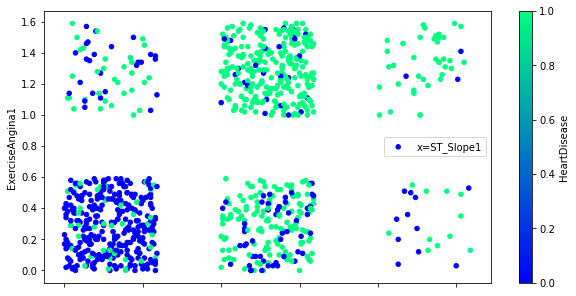

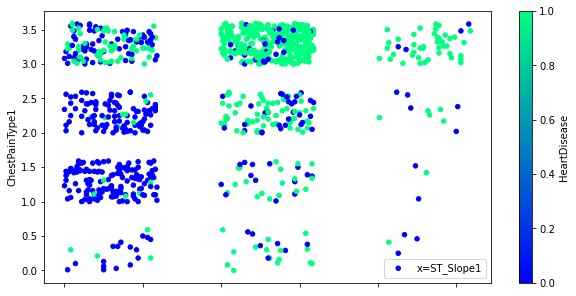

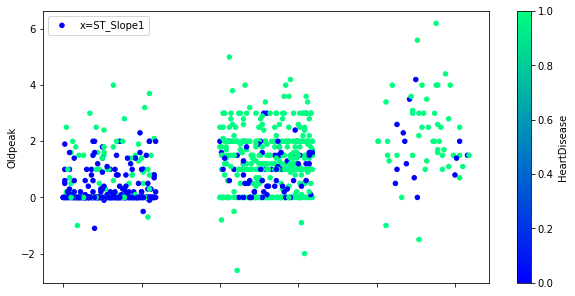

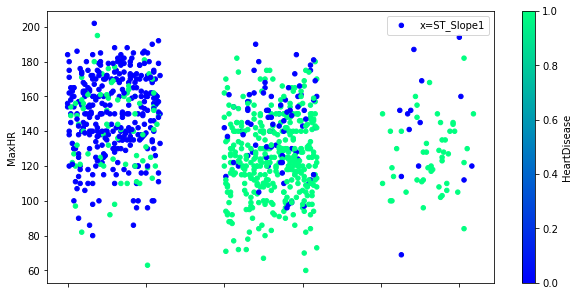

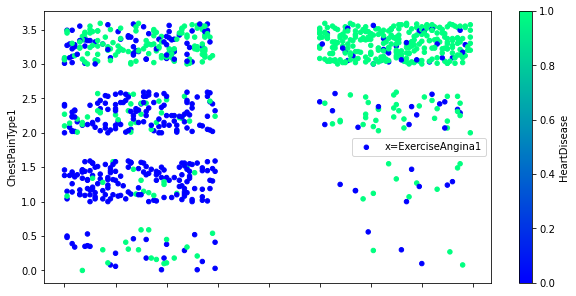

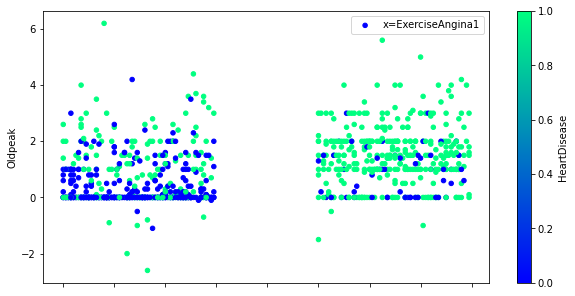

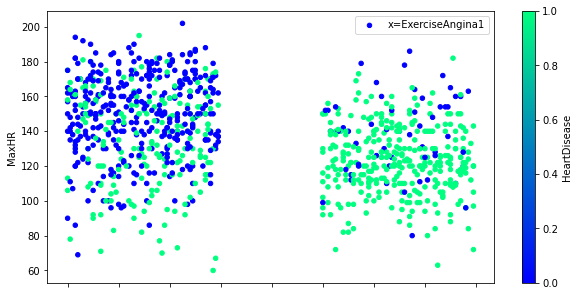

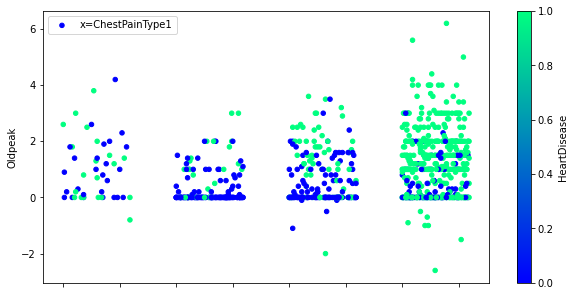

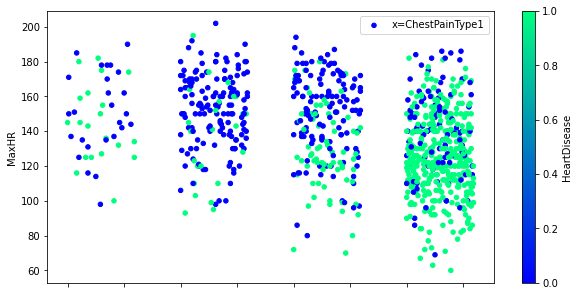

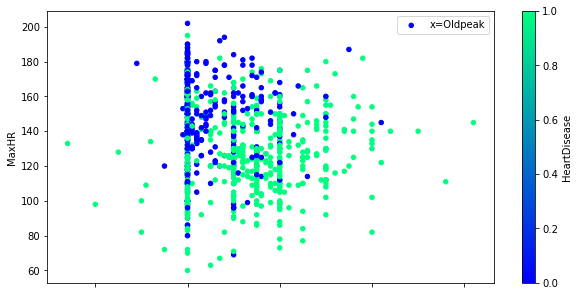

In [16]:
import random
aumento = 60
dt['ST_Slope1'] = dt['ST_Slope'].apply(lambda x : x+(random.randrange(0,aumento)/100))
dt['ExerciseAngina1'] = dt['ExerciseAngina'].apply(lambda x : x+(random.randrange(0,aumento)/100))
dt['ChestPainType1'] = dt['ChestPainType'].apply(lambda x : x+(random.randrange(0,aumento)/100))


# Gerar uma matriz de confusao:
All_col = ['ST_Slope1','ExerciseAngina1','ChestPainType1','Oldpeak','MaxHR']
col = []
for x in range(len(All_col)):
    for xx in range(x+1,len(All_col)):
        col.append( (All_col[x],All_col[xx]))
        

for c in col:
    dt.plot(kind='scatter', x=c[0], y = c[1], alpha=1,
        label='x='+c[0], title='',
        c='HeartDisease', cmap=plt.get_cmap("winter"),
        figsize=(10,5)
       )
    plt.legend()


Matriz de confusão: 


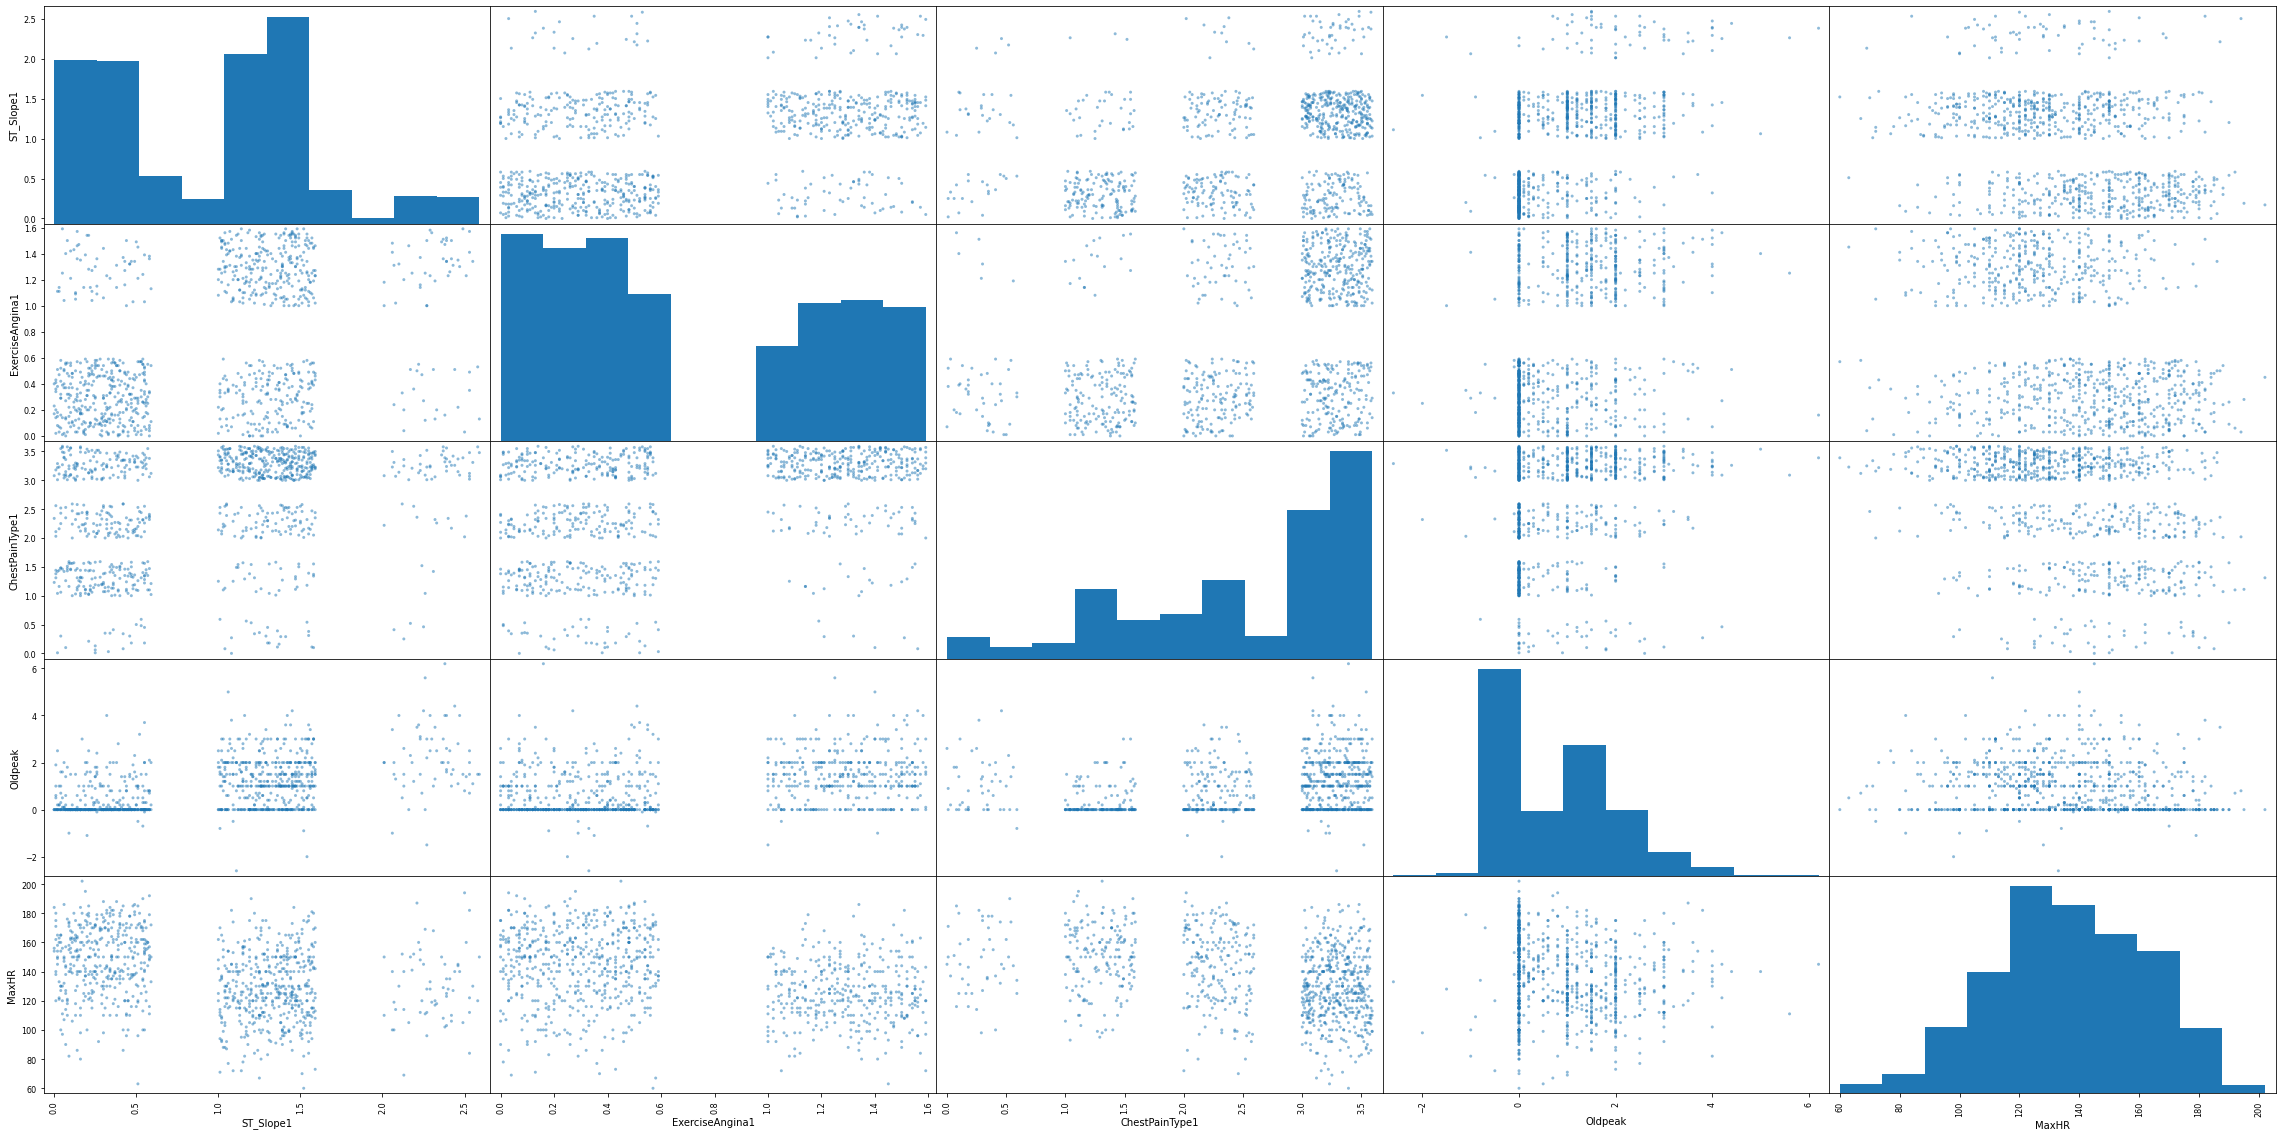

In [31]:
dbin = pd.DataFrame()

for i in All_col:
    dbin[i] = dt[i]

pd.plotting.scatter_matrix(dbin,figsize=(40,20))
print('Matriz de confusão: ')
#pd.plotting.scatter_matrix(dt, figsize=(20,10))
#pd.plotting.scatter_matrix(dt, figsize=(20,10))

In [18]:
"""dt.plot(kind="scatter", x="indices", y="ChestPainType", alpha=0.4,
# s=dt['Cholesterol'] , 
s = (dt['ExerciseAngina']*10)+1,
label=" ",        
c="HeartDisease",cmap=plt.get_cmap("jet"), colorbar=True,
figsize=(20,5)
)
plt.legend( )
"""

'dt.plot(kind="scatter", x="indices", y="ChestPainType", alpha=0.4,\n# s=dt[\'Cholesterol\'] , \ns = (dt[\'ExerciseAngina\']*10)+1,\nlabel=" ",        \nc="HeartDisease",cmap=plt.get_cmap("jet"), colorbar=True,\nfigsize=(20,5)\n)\nplt.legend( )\n'

In [19]:
#dt.plot(kind = 'scatter',y='ExerciseAngina',x='HeartDisease')

In [20]:
#dt[ dt['ExerciseAngina']==1]

In [21]:
#dt['indices'] = [a for a in range(918)]

<AxesSubplot:xlabel='indices', ylabel='HeartDisease'>

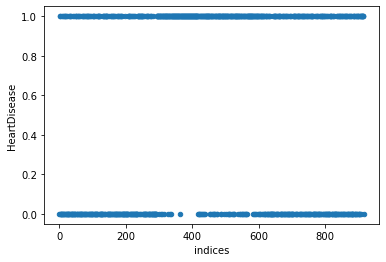

In [22]:
#dt.plot(kind='scatter', x='indices',y='HeartDisease')

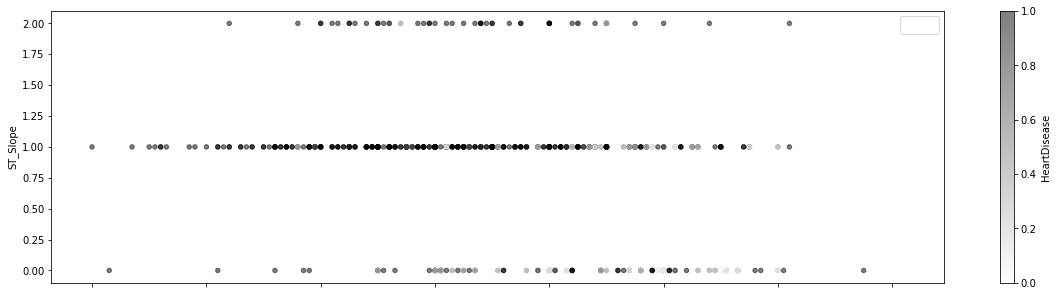

In [24]:
dt.plot(kind="scatter", x="MaxHR", y="ST_Slope", alpha=0.5,
# s=dt['Cholesterol'] , 
# s = (dt['ExerciseAngina']*10)+1,

label=" ",        
c="HeartDisease",cmap=plt.get_cmap("binary"), colorbar=True,
figsize=(20,5)
)
plt.legend( )

In [25]:
# me parece que temos varias variaveis binárias
## como cada uma delas se relacionam com a chance de ter doença cardíaca?
# vamos testar os fields com a maior correlação:
# ST_Slope
# ExerciseAngina
# ChestPainType
# Como fazemos isso?
# Como comparar dois valores binarios?




In [26]:
# dt.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,indices
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,2.251634,132.540737,236.047413,0.233115,0.603486,136.809368,0.404139,0.887364,0.638344,0.553377,458.500000
std,9.432617,0.407701,0.931031,17.989932,56.240952,0.423046,0.805968,25.460334,0.490992,1.066570,0.607056,0.497414,265.148072
min,28.000000,0.000000,0.000000,80.000000,85.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000,0.000000
25%,47.000000,1.000000,2.000000,120.000000,198.799564,0.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000,229.250000
50%,54.000000,1.000000,3.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,1.000000,1.000000,458.500000
75%,60.000000,1.000000,3.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,1.000000,1.000000,687.750000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000,917.000000


<AxesSubplot:xlabel='ExerciseAngina', ylabel='ST_Slope'>

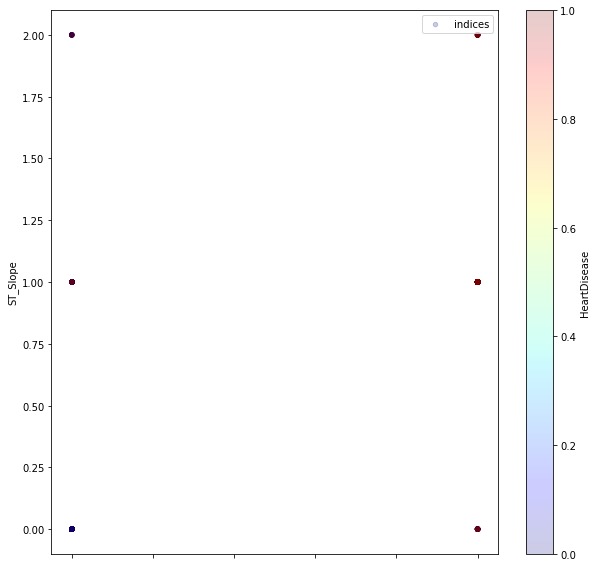

In [27]:
# dt.plot(kind='scatter', x='ExerciseAngina', y = 'ST_Slope', alpha=0.2,label="indices", c='HeartDisease', cmap=plt.get_cmap("jet"),figsize=(10,10))

In [41]:
import random
aumento = 80
dt['ST_Slope1'] = dt['ST_Slope'].apply(lambda x : x+(random.randrange(0,aumento)/100))
dt['ExerciseAngina1'] = dt['ExerciseAngina'].apply(lambda x : x+(random.randrange(0,aumento)/100))
dt['ChestPainType1'] = dt['ChestPainType'].apply(lambda x : x+(random.randrange(0,aumento)/100))
 




<AxesSubplot:title={'center':'test'}, xlabel='ExerciseAngina1', ylabel='ST_Slope1'>

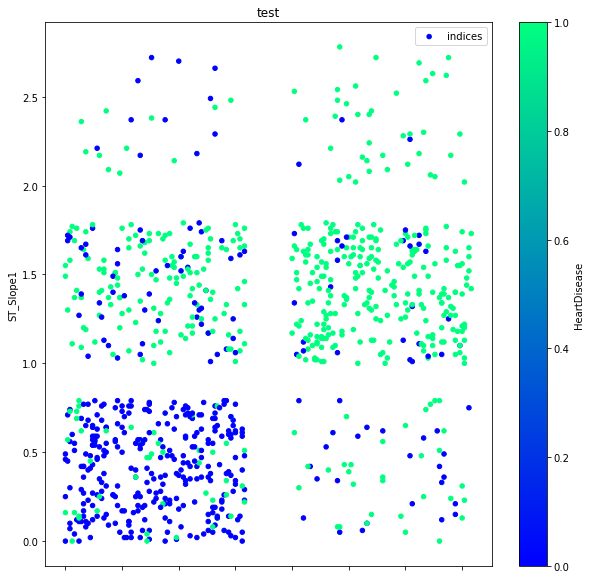

In [44]:
# Agora ficou visível uma relação, não?!
dt.plot(kind='scatter', x='ExerciseAngina1', y = 'ST_Slope1', alpha=1,
        label="indices", title='test',
        c='HeartDisease', cmap=plt.get_cmap("winter"),
        figsize=(10,10)
       )
 


In [45]:
# vamos tentar colocar mais uma variavel no jogo?
"""
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
"""

"\nfrom mpl_toolkits.mplot3d import Axes3D\nfig = plt.figure()\nax = fig.add_subplot(111, projection='3d')\n"

<AxesSubplot:title={'center':'test'}, xlabel="{'center': 'test', 'labelpad': 1}", ylabel='ST_Slope1'>

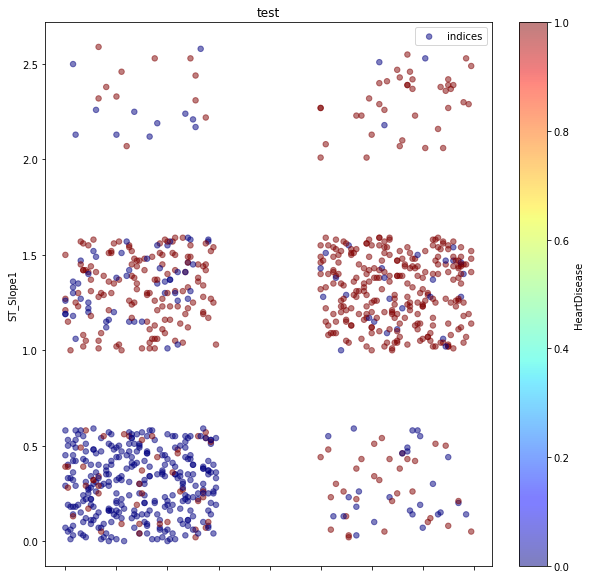

In [34]:
# Relação entre 

# style = 
dt.plot(kind='scatter', x='ExerciseAngina1', y = 'ST_Slope1', alpha=0.5,
        label="indices", title='test',
        c='HeartDisease', cmap=plt.get_cmap("jet"), s=30,
        figsize=(10,10),
        xlabel={'center':'test', 'labelpad':1}
       )
#print(dt.axes)


<AxesSubplot:xlabel='ExerciseAngina1', ylabel='ChestPainType1'>

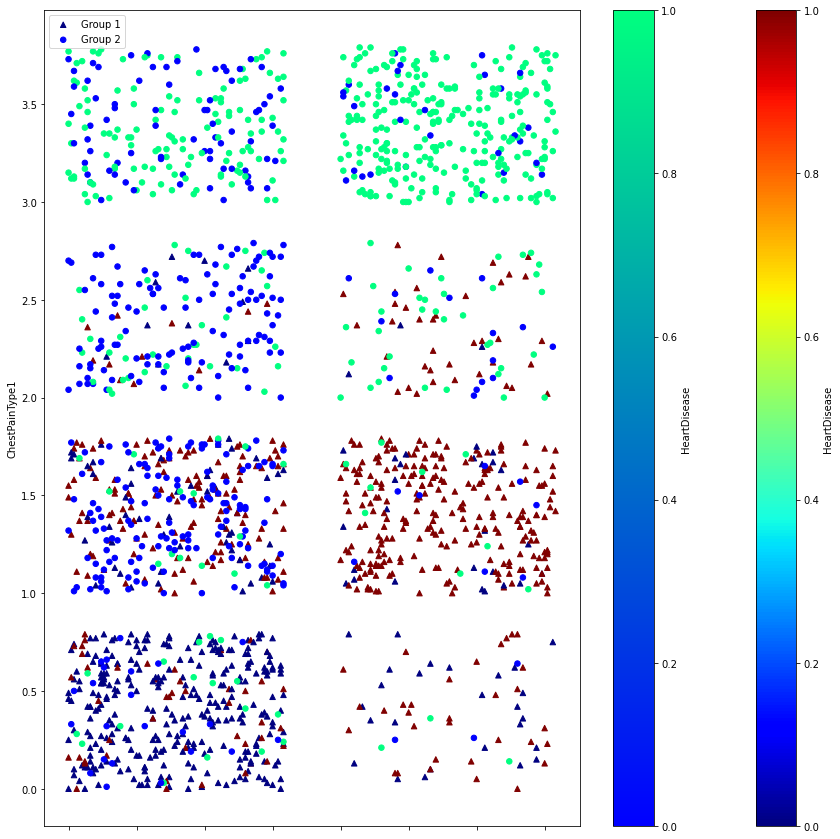

In [46]:
"""dt.plot(kind='scatter', x='ExerciseAngina1', y = 'ChestPainType', alpha=0.5,
        label="indices", title='test',
        c='HeartDisease', cmap=plt.get_cmap("jet"), marker='^',
        figsize=(10,10)
       )
plt.xlabel("Culmen Length (mm)",fontweight ='bold', size=14)    
"""

"""
ST_Slope
ExerciseAngina
ChestPainType
Oldpeak
"""

ax = dt.plot.scatter(x='ExerciseAngina1', y = 'ST_Slope1' , label="Group 1", c='HeartDisease', cmap=plt.get_cmap("jet"), marker='^', s=30)



dt.plot.scatter(x='ExerciseAngina1', y = 'ChestPainType1', label="Group 2",  c='HeartDisease', 
                cmap=plt.get_cmap("winter"), ax=ax,figsize=(15,15),s=30)




<AxesSubplot:title={'center':'test'}, xlabel='ExerciseAngina1', ylabel='ST_Slope1'>

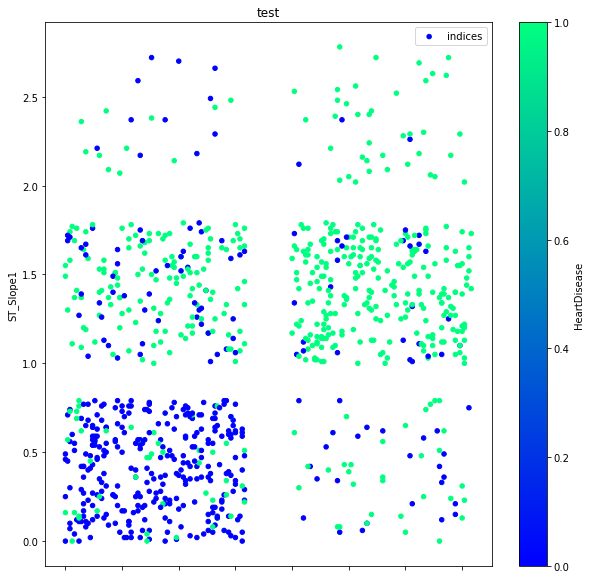

In [47]:

dt.plot(kind='scatter', x='ExerciseAngina1', y = 'ST_Slope1', alpha=1,
        label="indices", title='test',
        c='HeartDisease', cmap=plt.get_cmap("winter"),
        figsize=(10,10)
       )
 

In [48]:
# Por que NÃO foi considerado o sexo do indivíduo?
# O problema de considerar o sexo é que os dados são experimentais, portanto, 
# a relação do banco de dados pode ser tendenciosa e não necessáriamente refletir o que acontece na natureaza

In [ ]:
# Vamos investigar as variáveis que possuem maior correlação:


In [62]:
from sklearn.model_selection import train_test_split
x_treino,x_teste,  y_treino,y_teste, = train_test_split(dbin,dt['HeartDisease'],test_size= 0.2)

from sklearn.ensemble import ExtraTreesClassifier
modelo = ExtraTreesClassifier(n_estimators=100)
modelo.fit(x_treino,y_treino)

print('Accuracy: ',modelo.score(x_teste,y_teste))



Accuracy:  0.7771739130434783
